## 情人节词云示例

### 1.引入相关的库包：

In [1]:
#coding:utf-8
__author__ = 'Hanxiaoyang'
import re
import time
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud#词云包

### 表情统计

In [2]:
dateparse = lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(x)/1000))
content = pd.read_csv('message-18-02-08.csv', encoding='gb18030', 
                          parse_dates=['createTime'], date_parser=dateparse)
cols = ["msgId","msgSvrId","type","status","isSend","isShowTimer","createTime","talker","content","imgPath","reserved","lvbuffer","transContent","transBrandWording","talkerId","bizClientMsgId","bizChatId","bizChatUserId","msgSeq","flag"]
print content[(content.talker=='love-a-jun')&(content.type==1)][cols].head(200)

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


     msgId      msgSvrId  type  status  isSend  isShowTimer  \
27      29  1.505219e+17     1     2.0     1.0          NaN   
29      31  1.811530e+18     1     2.0     1.0          NaN   
31      33  3.016277e+17     1     3.0     0.0          NaN   
32      34  1.747513e+18     1     3.0     0.0          NaN   
33      35  3.001728e+18     1     2.0     1.0          NaN   
34      36  8.740559e+18     1     3.0     0.0          NaN   
35      37  3.531859e+18     1     3.0     0.0          NaN   
36      38  7.587774e+18     1     2.0     1.0          NaN   
37      39  8.895799e+17     1     2.0     1.0          NaN   
38      40  4.705529e+18     1     2.0     1.0          NaN   
39      41  8.449130e+18     1     3.0     0.0          NaN   
41      43  9.139798e+18     1     3.0     0.0          NaN   
43      45  2.059459e+18     1     2.0     1.0          NaN   
44      46  2.800162e+18     1     2.0     1.0          NaN   
45      47  3.366648e+18     1     2.0     1.0         

In [3]:
reg = r'(\[[^\[]+\])|(\/\:[\:BX8]\-?[\)\~\(\$\|D\>\*\']+)|(\/\:\w*)|(|||)'
pattern = re.compile(reg)
#text_ = '[www]右上角[捂脸]是你吗/:8*哈哈/::-)呵呵/:hug哈哈/:B-)哈哈/:Strong/:showlove/:'
pureText = []
emojis = []
for i in content[(content.type==1)].index:
    text_ = content.loc[i, 'content'].encode()
    emotions = pattern.findall(text_) # re.match(reg, content.loc[24,'text'])
    temp = []
    for emoji in emotions:
        temp.append(''.join(emoji))
    emojis.append('_'.join(temp)) # 添加纯表情
    
    s = re.split(reg, text_)
    temp = []
    for j in range(len(s)):
        if j%5 == 0:
            temp.append(s[j])
    pureText.append(''.join(temp)) # 添加去除表情的纯文本信息
cols = ["msgId","status","isSend","createTime","talker","talkerId","msgSeq","flag"]
df_text = content[content.type==1][cols]
df_text.loc[:,'content'] = pureText
df_text.loc[:,'emojis'] = emojis

In [7]:
segment=[]
text_str = df_text[(df_text.talker=='love-a-jun')].to_string(columns=['content'],header=False, index=False)
jieba.enable_parallel(3) # 并行

special_words = [u'亲爱的',u'美美的',u'美美哒',u'没时间',u'时间段']
for sw in special_words:
    jieba.add_word(sw)
segs=jieba.cut(text_str) # 切词，“么么哒”才能出现
for seg in segs:
    if seg!='\r\n' and (len(seg) > 1 or seg.find(u'美') >= 0):
        if seg.find(u'美') >= 0:
            segment.append(u'美')
        segment.append(seg)

### 3.去停用词（“多喝热水”和闹嘴的小细节可以在这里抹去）

In [8]:
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'],encoding="utf-8")
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

### 4.统计词频（情侣对话日常高频词）

In [9]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(["计数"],ascending=False)
words_stat

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,segment,计数
1962,亲爱的,1205
9201,明天,625
4703,哈哈哈,523
1513,东西,514
4411,吃饭,453
2048,今晚,417
7562,感觉,417
4909,回来,379
1384,不用,372
4886,回去,360


### 5.做词云（开启亮瞎眼么么哒模式）

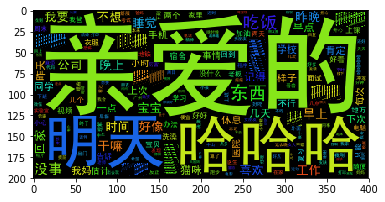

In [10]:
%matplotlib inline
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.fit_words(words_stat.head(1000).itertuples(index=False))
plt.imshow(wordcloud)
plt.show()

### 6.自定义背景图做词云（让他看到你的心）

In [11]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [17]:
bimg=imread('pic/source/jun.jpg')
wordcloud=WordCloud(background_color="white", max_words=8000, mask=bimg,
                    max_font_size=45, random_state=42, font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(words_stat.head(20000).itertuples(index=False))
bimgColors=ImageColorGenerator(bimg)
#plt.axis("off")

frame = plt.gca()
# y 轴不可见
frame.axes.get_yaxis().set_visible(False)
# x 轴不可见
frame.axes.get_xaxis().set_visible(False)

plt.imshow(wordcloud.recolor(color_func=bimgColors), interpolation="bilinear")
#plt.show()
plt.savefig("pic/word_cloud/profile-2.png", bbox_inches='tight', transparent=True, 
            format='png', dpi=1800, pad_inches=0, facecolor='w', edgecolor='w') # 
plt.close()

In [ ]:
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
#plt.show()
plt.savefig("pro-1-wordcloud.png", dpi=1000)

In [15]:
%matplotlib
bimg=imread('heart.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(words_stat.head(39769).itertuples(index=False))
bimgColors=ImageColorGenerator(bimg)
#plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()

Using matplotlib backend: TkAgg
